<a href="https://colab.research.google.com/github/RaviGprec/Machine-Learning/blob/master/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets #for dataset purpose only 
df = datasets.load_iris()

In [2]:
df.data.shape

(150, 4)

In [3]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
X = df.data[:, : 2]
Y  = (df.target != 0) * 1 # Actually we have 3 classes but for our learnining purpose we will convert into 2 classes only

In [5]:
X.shape

(150, 2)

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

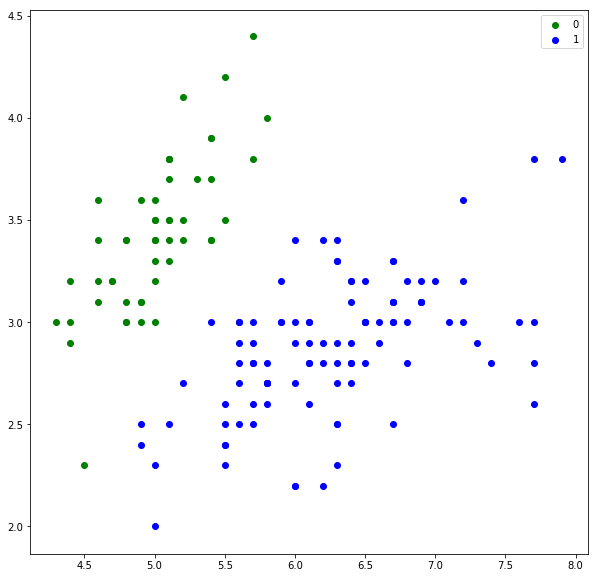

In [7]:
#Now we have X, Y data ready. Lets see the data on the graph
plt.figure(figsize = (10,10))
plt.scatter(X[Y==0][:,0],X[Y==0][:,1],color = 'g', label = 0)
plt.scatter(X[Y==1][:,0], X[Y==1][:,1],color = 'b', label = 1)
plt.legend()

In [8]:
np.zeros((X.shape[1], 1),dtype = int)

array([[0],
       [0]])

In [9]:
Y.shape[0]

150

In [0]:
y= [92.32,32.2, ]

In [11]:
class logisticRegression:
  def __init__(self, lr = 0.01, n_iters = 1000):
    self.lr = lr 
    self.n_iters  = n_iters

  def add_intercept(self, X):
    self.intercept = np.ones((X.shape[0],1), dtype= int)
    return np.concatenate((self.intercept, X), axis = 1)

  def sigmoid(self, z):
    return 1/(1+ np.exp(-z))

  def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

  def fit(self, X, Y):
    X = self.add_intercept(X)
    #lets initialize weights 
    self.W = np.zeros((X.shape[1]),dtype = int)
    print(self.W.shape)
    for i in range(self.n_iters):
      z = np.dot(X,self.W)
      h = self.sigmoid(z)
      gradient = np.dot(X.T, (h - Y)) / Y.size
      #print(gradient)
      #print(self.W)
      self.W = self.W - (self.lr * gradient/Y.shape[0])
      z = np.dot(X,self.W)
      Y_p = self.sigmoid(z)
      y_pred = Y_p.round()
      print("loss : ", self.loss(Y_p, Y))

  def predict(self,x_test):
    x_test = self.add_intercept(x_test)
    y_test_p = self.sigmoid(np.dot(x_test, self.W))
    y_test_p = self.prob_to_int(y_test_p)

  def predict_prob(self, X):
        X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.W))

lrmodel = logisticRegression()
lrmodel.fit(X,Y)

(3,)
loss :  0.6930307707078152
loss :  0.6929145300608903
loss :  0.6927984583653582
loss :  0.6926825553677579
loss :  0.6925668208149781
loss :  0.6924512544542583
loss :  0.692335856033187
loss :  0.6922206252997031
loss :  0.6921055620020939
loss :  0.6919906658889962
loss :  0.6918759367093944
loss :  0.6917613742126218
loss :  0.6916469781483596
loss :  0.6915327482666356
loss :  0.6914186843178259
loss :  0.6913047860526531
loss :  0.6911910532221858
loss :  0.6910774855778394
loss :  0.690964082871375
loss :  0.690850844854899
loss :  0.6907377712808634
loss :  0.690624861902065
loss :  0.6905121164716449
loss :  0.6903995347430887
loss :  0.6902871164702256
loss :  0.6901748614072286
loss :  0.6900627693086138
loss :  0.6899508399292403
loss :  0.6898390730243098
loss :  0.6897274683493659
loss :  0.6896160256602943
loss :  0.6895047447133222
loss :  0.6893936252650184
loss :  0.6892826670722919
loss :  0.6891718698923928
loss :  0.6890612334829113
loss :  0.688950757601777
l

In [12]:
lrmodel.W

array([0.00733248, 0.06108504, 0.01417708])

In [0]:
from  sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)

In [14]:
model.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.intercept_, model.coef_

(array([-80.54201957]), array([[ 31.5951929 , -28.30153825]]))